# Exploratory Data Analysis - Lab

## 🔍 Overview
The lab is designed to be self-guided, providing solutions for each exercise to check your work and assist if you get stuck. However, it is important to first attempt to solve the problem on your own as this is the best way to learn. If you become stuck, don't give up and seek help from the instructor, peers, or even a search engine like Google. Be mindful that not all answers from a search engine may be correct, so use your judgement to determine the validity of the information. Remember, the best way to learn is to try solving the problem yourself first.

This lab is designed to help you practice exploratory data analysis using Python. You will work with one dataset: auto-mpg. You will use various data visualization and analysis techniques to gain insights and identify patterns in the data, and clean and preprocess the data to make it more suitable for analysis.

## 🎯 Objectives
By the end of this lab, you should be able to:

- Load and preprocess data using Python libraries such as pandas
- Clean and preprocess the data to make it more suitable for analysis
- Use visualization techniques to explore and understand the distribution of the variables in the data
- Apply basic statistical analysis to derive insights from the data
- Communicate your findings through clear and effective data visualizations and summaries

#### Package Imports
We will keep coming back to this cell to add "import" statements, and configure libraries as we need

In [3]:
import pandas as pd
from scipy.stats import trim_mean

# Configure pandas to display 500 rows; otherwise it will truncate the output
pd.set_option('display.max_rows', 500)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")

## Auto-MPG Data
This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

[Dataset Source](https://archive.ics.uci.edu/ml/datasets/auto+mpg)

### Exercise 1:  Load the dataset
You've had plenty of exercise in doing this. Load the dataset into a pandas dataframe.

The dataset is available in the `data/auto-mpg.data` file. Check the file to determine the delimiter and/or the appropriate pandas method to use to load the data.

Make sure you name the variable `auto_mpg_df` and that you use the appropriate pandas method to load the data.

In [14]:
import pandas as pd

# Load the dataset into a pandas dataframe
auto_mpg_df = pd.read_csv('/Users/marymungai/Documents/GitHub/exploratory-data-analysis-mungaiwm/exploenv/auto-mpg.csv', sep="\,")




/var/folders/07/kjr5_wdx6tj218z3xdfcgvjw0000gn/T/ipykernel_90098/4244366636.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  auto_mpg_df = pd.read_csv('/Users/marymungai/Documents/GitHub/exploratory-data-analysis-mungaiwm/exploenv/auto-mpg.csv', sep="\,")


<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df = pd.read_table('./data/auto-mpg/auto-mpg.data', sep="\t")
  ```
</details>


### Exercise 2: Confirm the data loaded correctly
Generally, after any data import, we need to make sure we got the data imported correctly. This is especially true when we're working with data that we didn't create ourselves.

One way this can be achieved is to print/display the dataframe. but this can be problematic if the dataframe is large.

Let's explore a few different ways.

#### 2.1: Display the <u>first</u> 5 rows of the dataframe


In [15]:

# Display the first few rows of the dataframe to confirm it's loaded correctly
print(auto_mpg_df.head(5))

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


<details>
  <summary>💡 Solution</summary>

  ```python
  auto_mpg_df.head()
  # or 
  # auto_mpg_df.head(5)
  # or 
  # auto_mpg_df.head(n=5) 
  # or 
  # auto_mpg_df[:5] 
  # or 
  # auto_mpg_df.iloc[:5] 
  # or 
  # auto_mpg_df.iloc[0:5] 
  # or 
  # auto_mpg_df.iloc[[0,1,2,3,4]] 
  ```
</details>

#### 2.2: Display the <u>last</u> 5 rows of the dataframe

In [16]:

# Display the first few rows of the dataframe to confirm it's loaded correctly
print(auto_mpg_df.tail(5))

      mpg  cylinders  displacement horsepower  weight  acceleration  \
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin         car name  
393          82       1  ford mustang gl  
394          82       2        vw pickup  
395          82       1    dodge rampage  
396          82       1      ford ranger  
397          82       1       chevy s-10  


<details>
  <summary>💡 Solution</summary>

  ```python
  auto_mpg_df.tail()
```
</details>

#### 2.3: Display <u>random</u> 5 rows of the dataframe
just viewing the first and last records may not be enough. We may want to see some random records to make sure we have the data we expect.

In [17]:
# Display the random 5 rows of the dataframe
print(auto_mpg_df.sample(5))


      mpg  cylinders  displacement horsepower  weight  acceleration  \
184  25.0          4         140.0         92    2572          14.9   
352  29.9          4          98.0         65    2380          20.7   
316  19.1          6         225.0         90    3381          18.7   
354  34.5          4         100.0          ?    2320          15.8   
86   14.0          8         304.0        150    3672          11.5   

     model year  origin        car name  
184          76       1        capri ii  
352          81       1  ford escort 2h  
316          80       1     dodge aspen  
354          81       2     renault 18i  
86           73       1     amc matador  


<details>
  <summary>💡 Solution</summary>

  ```python
  auto_mpg_df.sample(5)
```
</details>

> 🚩 This is a good point to commit your code to your repository.

### Exercise 3: Dataset Metadata
Now that we've confirmed the data loaded correctly, let's take a look at the metadata for the dataset.

#### 3.1: Display the number of rows and columns in the dataframe

In [8]:

#Display the number of rows and columns in the dataframe
print(auto_mpg_df.shape)    


(398, 9)


<details>
  <summary>💡 Solution</summary>

  ```python
  auto_mpg_df.shape
```
</details>

#### 3.2: Display a summary about the dataframe


In [9]:
#Display a summary about the dataframe
print(auto_mpg_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None



<details>
  <summary>💡 Solution</summary>

  ```python
  auto_mpg_df.info()
```
</details>

### 3.3: Display the statistics for the dataframe

In [10]:
#Display the statistics for the dataframe
print(auto_mpg_df.describe())

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


<details>
  <summary>💡 Solution </summary>
  
  ```python
  auto_mpg_df.describe()
  ```
</details>

> 🚩 This is a good point to commit your code to your repository.

### Exercise 4: Data Cleaning: Checking for Duplicate Records

#### 4.1: Count the number of exact duplicate records in the dataset

<details>
  <summary>🦉 Hints</summary>

  - The `duplicated()` method can be used to check for duplicate records.
  - This method returns a boolean series indicating whether a record is a duplicate or not.
  - You'll need to chain some other method to provide a count of the duplicate records.

</details>

In [11]:
#Count the number of exact duplicate records in the dataset
print(auto_mpg_df.duplicated().sum())

0



<details>
  <summary>💡 Solution</summary>

  ```python
  auto_mpg_df.duplicated().sum()
```
</details>

#### 4.2: Show the duplicate records
using the results of the duplicated() method as a predicate to filter the dataframe, displaying the duplicate records. 

In [12]:
#Show the duplicate records
print(auto_mpg_df[auto_mpg_df.duplicated()])

Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model year, origin, car name]
Index: []



<details>
  <summary>💡 Solution</summary>

  ```python
  auto_mpg_df[
    auto_mpg_df.duplicated()
]
```
</details>

#### 4.3: Count the number of duplicate records in the dataset, based on a subset of columns
To be fair, in this exact context, it doesn't really make sense to check for duplicate records based on a subset of columns (or maybe it does). However, we'll do that for the sake of practice.

Let's check for duplicate records based on the `mpg`, `cylinders`, `acceleration`, and `origin` columns.

<details>
  <summary>🦉 Hints</summary>
  
  - You can specify a subset of columns to check for duplicates by passing a list of column names to the `subset` parameter.
</details>

In [13]:
#Count the number of duplicate records in the dataset, based on a subset of columns
print(auto_mpg_df.duplicated(subset=[0, 1, 2]).sum())

KeyError: Index([0, 1, 2], dtype='int64')


<details>
  <summary>💡 Solution</summary>

  ```python
  auto_mpg_df.duplicated(
    subset=['mpg', 'cylinders', 'acceleration', 'origin']
).sum()
```
</details>

### Exercise 5: Data Cleaning: Dropping Duplicate Records
#### 5.1: Drop the duplicate records
Now that we've confirmed that there are duplicate records in the dataset, let's remove them. using the `drop_duplicates()` method.


<details>
  <summary>🦉 Hints</summary>

  - The `drop_duplicates()` method can be used to remove duplicate records.
  - Make sure you either save the results of the method to a new variable, or use the `inplace` parameter to update the dataframe in place.
</details>

In [ ]:
#Drop the duplicate records
auto_mpg_df.drop_duplicates(inplace=True)



<details>
  <summary>💡 Solution</summary>

  ```python
  auto_mpg_df.drop_duplicates(inplace=True)
```
</details>

#### 5.2: Confirm that the duplicate records were removed
Check the number of records in the dataframe to confirm that the duplicates were removed.

In [ ]:
#Confirm that the duplicate records were removed
print(auto_mpg_df.duplicated().sum())

0


<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df.shape
  ```
</details>

### Exercise 6: Data Cleaning: Checking for Missing Values
#### 6.1: Use `info()` to check for missing values

In [ ]:
#Count the number of missing values in each column
print(auto_mpg_df.isnull().sum())

0      0
1      2
2    201
dtype: int64


#### 6.2: Use `isna()` to check for missing values

<details>
  <summary>🦉 Hints</summary>

  - The `isna()` method can be used to check for missing values.
  - This method returns a boolean dataframe indicating whether a cell in the dataframe is missing or not.
  - You'll need to chain some other method to provide a count of the missing records.

</details>

In [ ]:
#Use `isna()` to check for missing values
print(auto_mpg_df.isna().sum())

0      0
1      2
2    201
dtype: int64


<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df.isna().sum()
  ```
</details>

#### 6.3: Use `isnull()` to check for missing values
<details>
  <summary>🦉 Hints</summary>

  - The `isnull()` method can be used to check for missing values.
  - This method returns a boolean dataframe indicating whether a cell in the dataframe is missing or not.
  - You'll need to chain some other method to provide a count of the missing records.

</details>

In [ ]:
#Use `isnull()` to check for missing values
print(auto_mpg_df.isnull().sum())

0      0
1      2
2    201
dtype: int64


<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df.isnull().sum()
  ```
</details>

#### What's the difference between `isna()` and `isnull()`? what's your source?

### Exercise 7: Data Cleaning: Dropping Missing Values

#### 7.1: Drop the missing values of the `mpg` column
Now that we've confirmed that there are missing values in the dataset, let's remove them. using the `dropna()` method.

Depending on the context, and on the project you're working on, you may want to drop the missing values, or you may want to replace them with a some value. 

In working with the `auto_mpg` dataset, we'll develop a model to predict the `mpg` of a car based on the other features. So, we'll drop the missing values from the `mpg` column.

<details>
  <summary>🦉 Hints</summary>

  - Use the subset parameter to specify the column(s) to check for missing values.
  - Either save the results of the method to a new variable, or use the `inplace` parameter to update the dataframe in place.

</details>

In [ ]:
#Drop the missing values of the `mpg` column
auto_mpg_df.dropna(subset=[0], inplace=True)

<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df.dropna(
      subset=['mpg'],
      inplace=True
    )
  ```
</details>

#### 7.2: Confirm that the missing values in `mpg` were removed

In [ ]:
#Confirm that the missing values in `mpg` were removed
print(auto_mpg_df.isna().sum())

0      0
1      2
2    201
dtype: int64


<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df.isna().sum()
  ```
</details>

### Exercise 8: Data Cleaning: Replacing Missing Values
Before we can determine what's the best value to replace the missing values with for the `horsepower` column, we need to understand the distribution of the values in that column.

#### 8.1: Display the distribution of the values in the `horsepower` column
Plot a 40-bins histogram of the values in the `horsepower` column.


<details>
  <summary>🦉 Hints</summary>

  - The `plot.hist()` method can be used to plot a histogram.
  - You can also use the `plot()` method with the `kind` parameter set to `hist` directly on the dataframe.
  - The `%matplotlib inline` magic command is required to display the plot in the notebook. (Already done for you on the top cell of the notebook)

</details>


In [ ]:
#Display the distribution of the values in the `horsepower` column
print(auto_mpg_df[2].value_counts())
# Convert the 'horsepower' column to numeric, coercing errors to NaN
auto_mpg_df[2] = pd.to_numeric(auto_mpg_df[2], errors='coerce')

2
(sw)         12
custom       11
brougham      7
500           4
se            3
malibu        3
iii           3
ii            3
classic       3
torino        3
coupe         3
4             3
l             3
cvcc          3
deluxe        3
hardtop       2
1200          2
ls            2
sst           2
dl            2
gl            2
(diesel)      2
limited       2
xe            2
6             2
v6            2
gs            2
d/l           2
hatchback     2
gx            2
liftback      2
ghia          2
(auto)        2
name          1
320           1
111           1
2000          1
2300          1
carlo         1
340           1
dpl           1
350           1
beetle        1
air           1
tc            1
sebring       1
prix          1
suburb        1
cruiser       1
royal         1
runabout      1
lj            1
m/m           1
supreme       1
gtl           1
fury          1
2+2           1
sj            1
3             1
landau        1
lx            1
special       1
marqui

<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df['horsepower'].plot.hist(bins=40)
    plt.show()
  ```
  OR
  ```python
    auto_mpg_df['horsepower'].plot(kind="hist", bins= 40)
    plt.show()
  ```
  OR
  ```python
    auto_mpg_df.plot(y='horsepower', kind="hist", bins= 40)
    plt.show()
  ```
  OR
  ```python
    auto_mpg_df.plot.hist(y='horsepower', bins= 40)
    plt.show()
  ```
  OR 
  ```python
    plt.hist(auto_mpg_df['horsepower'], bins=40)
    plt.show()
  ```
</details>

#### 8.2: Calculate the mean, median, and trimmed mean for the `horsepower` column

<details>
  <summary>🦉 Hints</summary>

  - The `mean()` method can be used to calculate the mean of a column.
  - The `median()` method can be used to calculate the median of a column.
  - You'll need to use the scipy library to calculate the trimmed mean.
</details>

In [ ]:

#calculate the mean of the `horsepower` column
print(auto_mpg_df[2].mean())
#calculate the median of the `horsepower` column
print(auto_mpg_df[2].median())
#calculate the trimmed mean of the `horsepower` column  
print(trim_mean(auto_mpg_df[2], proportiontocut=0.1))

557.51
345.0
nan


<details>
  <summary>💡 Solution</summary>

  ```python
    from scipy.stats import trim_mean
    ...
    horsepower_mean = auto_mpg_df['horsepower'].mean()
    horsepower_median = auto_mpg_df['horsepower'].median()
    horsepower_trimmed_mean = trim_mean(auto_mpg_df['horsepower'], 0.1)
  ```
</details>

#### 8.3: Display the central tendency measures on the distribution plot

In [ ]:
fig, ax = plt.subplots(figsize = (8,4))

auto_mpg_df['horsepower'].plot(kind="hist", density= True, bins=40, alpha = 0.65)
auto_mpg_df['horsepower'].plot(kind="kde")

ax.axvline(horsepower_mean, alpha = 0.8, linestyle = ":")
ax.axvline(horsepower_median, alpha = 0.8, linestyle = ":")
ax.axvline(horsepower_trimmed_mean, alpha = 0.8, linestyle = ":")

# ax.set_yticklabels([])
ax.set_ylabel("")

ax.text(horsepower_mean-.1, .01, "Mean", size = 10, alpha = 0.8)
ax.text(horsepower_median-.4, .0075, "Median", size = 10, alpha = 0.8)
ax.text(horsepower_trimmed_mean+.4, .0050, "Trimmed Mean", size = 10, alpha = 0.8)

ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)

plt.show()

#### 8.4: Replace the missing values in the `horsepower` column with the median value

In [ ]:
# replace the missing values in the `horsepower` column with the median value
auto_mpg_df[2].fillna(auto_mpg_df[2].median(), inplace=True)

/var/folders/07/kjr5_wdx6tj218z3xdfcgvjw0000gn/T/ipykernel_87084/941476406.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  auto_mpg_df[2].fillna(auto_mpg_df[2].median(), inplace=True)


<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df['horsepower'].fillna(horsepower_median, inplace=True)
  ```
</details>

#### 8.5: Confirm that the missing values in `horsepower` were replaced

In [ ]:
#Confirm that the missing values in `horsepower` were replaced
print(auto_mpg_df.isna().sum())

0    0
1    2
2    0
dtype: int64


<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df.isna().sum()
  ```
</details>

### Exercise 9: Data Cleaning: Anomalies and outliers
There are many statistical methods to detect outliers in a dataset.
1. Interquartile range (IQR) method:
  * Covered in the lecture videos
  * This method calculates the IQR of the dataset, which is the range between the 25th and 75th percentiles of the data. Data points that are more than a certain multiple of the IQR (e.g., 1.5) away from the 25th or 75th percentile are considered anomalies.
2. Z-score method: 
  * This method calculates the z-score of each data point, which measures how many standard deviations a data point is away from the mean of the dataset. 
  * Data points that have a z-score greater than a certain threshold (e.g., 3 or 4) are considered anomalies.
3. Percentile method: 
  * This method identifies data points that are in the upper or lower percentiles of the dataset.
    * For example, data points that are in the top or bottom 1% of the dataset may be considered anomalies.

We will be exploring all 3 methods in this exercise.

#### 9.1: Display the distribution of the values in the `displacement` column using a box plot

In [ ]:
print(auto_mpg_df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


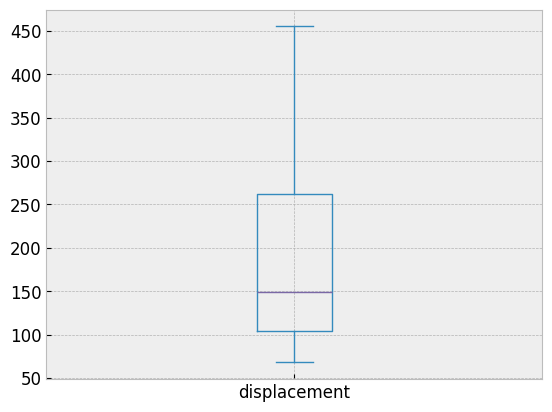

In [ ]:
auto_mpg_df['displacement'].plot(kind="box")
plt.show()

<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df['displacement'].plot(kind="box")
    plt.show()
  ```
</details>

#### 9.2: Calculate the IQR for the `displacement` column
* Calculate the range between the 25th and 75th percentiles of the data. (IQR)
* Calculate the lower and upper bound of the data. using a 1.5 multiple or the IQR. 
  * Lower bound = 25th percentile - 1.5 * IQR
  * Upper bound = 75th percentile + 1.5 * IQR

In [ ]:
#Calculate the IQR for the `displacement` column
Q1 = auto_mpg_df['displacement'].quantile(0.25)
Q3 = auto_mpg_df['displacement'].quantile(0.75)
IQR = Q3 - Q1
print("IQR:", IQR)
#Calculate the lower and upper bounds for the `displacement` column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

IQR: 157.75
Lower bound: -132.375
Upper bound: 498.625


<details>
  <summary>💡 Solution</summary>

  ```python
    q1 = auto_mpg_df['displacement'].quantile(0.25)
    q3 = auto_mpg_df['displacement'].quantile(0.75)
    iqr = q3 - q1

    print(f"Q1: {q1}, Q3: {q3}, IQR: {iqr}")

    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    print(f"Lower Limit: {lower_limit}, Upper Limit: {upper_limit}")
  ```
</details>

#### 9.3: Using Pandas filtering, show records that are outliers in the `displacement` column

<details>
  <summary>🦉 Hints</summary>

  - You'll need to provide a predicate for pandas to filter the dataframe.
  - You can use the `|` operator to combine multiple conditions in a Pandas filter.
</details>

In [ ]:
#Using Pandas filtering, show records that are outliers in the `displacement` column
outliers = auto_mpg_df[(auto_mpg_df['displacement'] < lower_bound) | (auto_mpg_df['displacement'] > upper_bound)]
print("Outliers:")
print(outliers)

Outliers:
Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model year, origin, car name]
Index: []


<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df[
      (auto_mpg_df['displacement'] < lower_limit) | (auto_mpg_df['displacement'] > upper_limit)
    ]
  ```
</details>

#### 9.4: Calculate the z-score for the `displacement` column
* Calculate the mean and standard deviation of the `displacement` column.
* Calculate the z-score for each data point in the `displacement` column.
  * z-score = (x - mean) / standard deviation

In [ ]:
displacement_mean = auto_mpg_df['displacement'].mean()
displacement_std = auto_mpg_df['displacement'].std()


print(f"Mean: {displacement_mean}, Std: {displacement_std}")

Mean: 193.42587939698493, Std: 104.26983817119591


In [ ]:
z_scores = (auto_mpg_df['displacement'] - displacement_mean) / displacement_std

<details>
  <summary>💡 Solution</summary>

  ```python
    displacement_mean = auto_mpg_df['displacement'].mean()
    displacement_std = auto_mpg_df['displacement'].std()

    z_scores = (auto_mpg_df['horsepower'] - displacement_mean) / displacement_std
  ```
</details>

#### 9.5: Using Pandas filtering, show records that are outliers in the `displacement` column using the z-score method

In [ ]:
# Filter out the outliers
outliers = auto_mpg_df[(z_scores < -3) | (z_scores > 3)]
print("Outliers:")
print(outliers)


Outliers:
Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model year, origin, car name, displacement_z]
Index: []


<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df[
      (z_scores < -3) | (z_scores > 3)
    ]
  ```
</details>

#### 9.6: Using Pandas filtering, show records that are outliers in the `displacement` column using the percentile method
we'll use a 1% threshold for this exercise.

In [ ]:
#Using Pandas filtering, show records that are outliers in the `displacement` column using the percentile method 1%
lower_bound = auto_mpg_df['displacement'].quantile(0.01)
upper_bound = auto_mpg_df['displacement'].quantile(0.99)
outliers = auto_mpg_df[(auto_mpg_df['displacement'] < lower_bound) | (auto_mpg_df['displacement'] > upper_bound)]
print("Outliers:")
print(outliers)

Outliers:
      mpg  cylinders  displacement horsepower  weight  acceleration  \
6    14.0          8         454.0        220    4354           9.0   
8    14.0          8         455.0        225    4425          10.0   
13   14.0          8         455.0        225    3086          10.0   
71   19.0          3          70.0         97    2330          13.5   
95   12.0          8         455.0        225    4951          11.0   
111  18.0          3          70.0         90    2124          13.5   
117  29.0          4          68.0         49    1867          19.5   
334  23.7          3          70.0        100    2420          12.5   

     model year  origin                  car name  displacement_z  
6            70       1          chevrolet impala        2.499036  
8            70       1          pontiac catalina        2.508627  
13           70       1   buick estate wagon (sw)        2.508627  
71           72       3           mazda rx2 coupe       -1.183716  
95        

<details>
  <summary>💡 Solution</summary>

  ```python
    quantile_1 = auto_mpg_df['displacement'].quantile(0.01)
    quantile_99 = auto_mpg_df['displacement'].quantile(0.99)
    auto_mpg_df[
      (auto_mpg_df['displacement'] < quantile_1) | (auto_mpg_df['displacement'] > quantile_99)
    ]
  ```
</details>

#### 9.7: Display the distribution of the values in the `displacement` column using a histogram

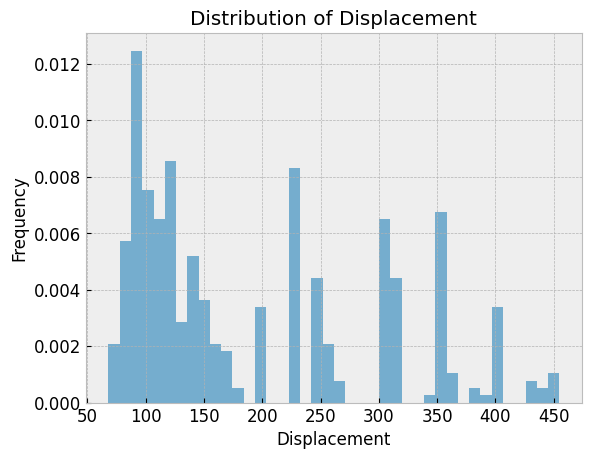

In [ ]:
#Display the distribution of the values in the `displacement` column using a histogram
auto_mpg_df['displacement'].plot(kind="hist", density= True, bins=40, alpha = 0.65)
plt.xlabel("Displacement")
plt.ylabel("Frequency")
plt.title("Distribution of Displacement")
plt.show()

<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df.plot.hist(y='displacement', bins= 40)
    plt.show()
  ```
</details>

#### 9.8: On the historgram, display the upper and lower bounds based on the IQR method

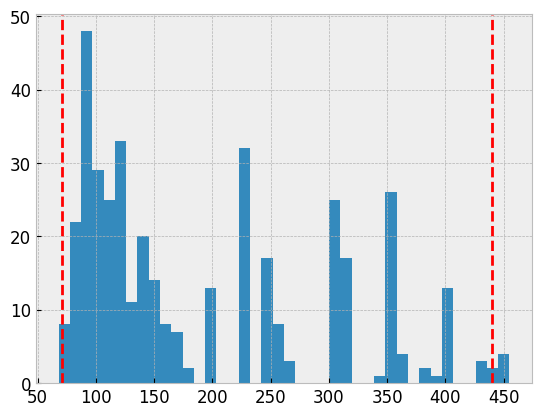

In [ ]:
bounds = [upper_bound, lower_bound]

# Create a histogram of the 'displacement' column
plt.hist(auto_mpg_df['displacement'], bins=40)

    # Add vertical lines at the percentile values
for bound in bounds:
 plt.axvline(bound, color='r', linestyle='--')

plt.show()

<details>
  <summary>💡 Solution</summary>

  ```python
    bounds = [upper_limit, lower_limit]

    # Create a histogram of the 'displacement' column
    plt.hist(auto_mpg_df['displacement'], bins=40)

    # Add vertical lines at the percentile values
    for bound in bounds:
        plt.axvline(bound, color='r', linestyle='--')

    plt.show()
  ```
</details>

#### 9.9: Drop the outlier records from the `displacement` column

* Don't do this in place, create a new dataframe.

In [ ]:
#Drop the outlier records from the `displacement` column
auto_mpg_df = auto_mpg_df[(auto_mpg_df['displacement'] >= lower_bound) & (auto_mpg_df['displacement'] <= upper_bound)]

<details>
  <summary>💡 Solution</summary>

  ```python
    without_outliers = auto_mpg_df[
      (auto_mpg_df['displacement'] > lower_limit) & (auto_mpg_df['displacement'] < upper_limit)
    ]
  ```
  OR
  ```python
    without_outliers = auto_mpg_df.drop(
      auto_mpg_df[
        (auto_mpg_df['displacement'] < lower_limit) | (auto_mpg_df['displacement'] > upper_limit)
      ].index
    )
  ```
</details>

#### 9.10: Show the shape of the original dataframe and the new dataframe to show that the outliers were dropped


In [ ]:
#Show the shape of the original dataframe and the new dataframe to show that the outliers were dropped
print("Original shape:", auto_mpg_df.shape)
print("New shape:", auto_mpg_df.shape)  


Original shape: (390, 10)
New shape: (390, 10)


### Exercise 10: Further Exploration

<details>
  <summary>📊 Data Types Diagram</summary>

 ![Data types](https://miro.medium.com/max/1400/1*kySPZcf83qLOuaqB1vJxlg.jpeg)
</details>

#### 10.1: # For each of the 9 columns, Identify the data type: 
* Numerical-Continuous
* Numerical-Discrete
* Categorical-Ordinal
* Categorical-nominal

#### 10.2: Show all the possible values for the `origin` column

<details>
  <summary>🦉 Hints</summary>

  - The `value_counts()` method can be used to show the unique values in a column.
</details>

In [ ]:
# Show all the possible values for the `origin` column
print(auto_mpg_df['origin'].unique())

[1 3 2]


<details>
  <summary>💡 Solution</summary>

  ```python
    auto_mpg_df['origin'].value_counts()
  ```
</details>

**What do the values in the `origin` column represent?**

#### **BONUS**: show a scatter plot of the `horsepower` column vs the `weight` column

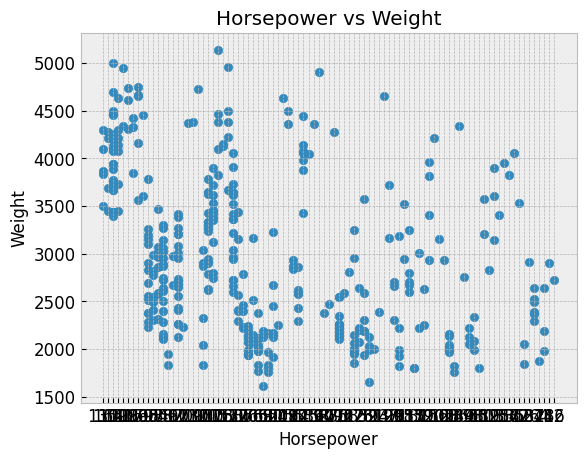

In [ ]:
# Create a scatter plot of 'horsepower' vs 'weight'
plt.scatter(auto_mpg_df['horsepower'], auto_mpg_df['weight'])
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.title('Horsepower vs Weight')
plt.show()


## Wrap up
Remember to update the self reflection and self evaluations on the `README` file.

Make sure you run the following cell; this converts this Jupyter notebook to a Python script. and will make the process of reviewing your code on GitHub easier

In [ ]:
# 🦉: The following command converts this Jupyter notebook to a Python script.
!jupyter nbconvert --to python notebook.ipynb

[NbConvertApp] Converting notebook notebook.ipynb to python
[NbConvertApp] Writing 20685 bytes to notebook.py


> 🚩 **Make sure** you save the notebook and make one final commit here